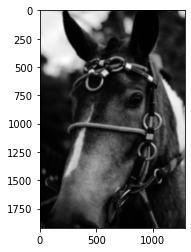

In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('horse_image.jpg')
plt.imshow(img, cmap='gray')

Considering that we want to reduce the blurriness of the image, we must use image sharpening filters. For this, we have used the Laplace filter mask matrix while alpha is equal to 0.

In [21]:
image_array = np.asarray(img)

In [22]:
def laplace_filter(image):
    

    # Define the Laplacian kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5, 1],
                       [0, -1, 0]])

    # Apply the Laplacian filter
    laplacian = np.abs(np.convolve(image.ravel(), kernel.ravel(), mode='same'))
    
    # Reshape the Laplacian to match the image shape
    laplacian = laplacian.reshape(image.shape)
    
    # Normalize the Laplacian to the range [0, 255]
    laplacian = (laplacian / np.max(laplacian)) * 255

    # Add the Laplacian to the original image for sharpening
    sharpened_image = np.clip(image + laplacian, 0, 255)

    # Convert the image to uint8 data type
    sharpened_image = sharpened_image.reshape(image.shape)
    sharpened_image = sharpened_image.astype(np.uint8)
    
    return sharpened_image

In [23]:
new_img = laplace_filter(image_array)

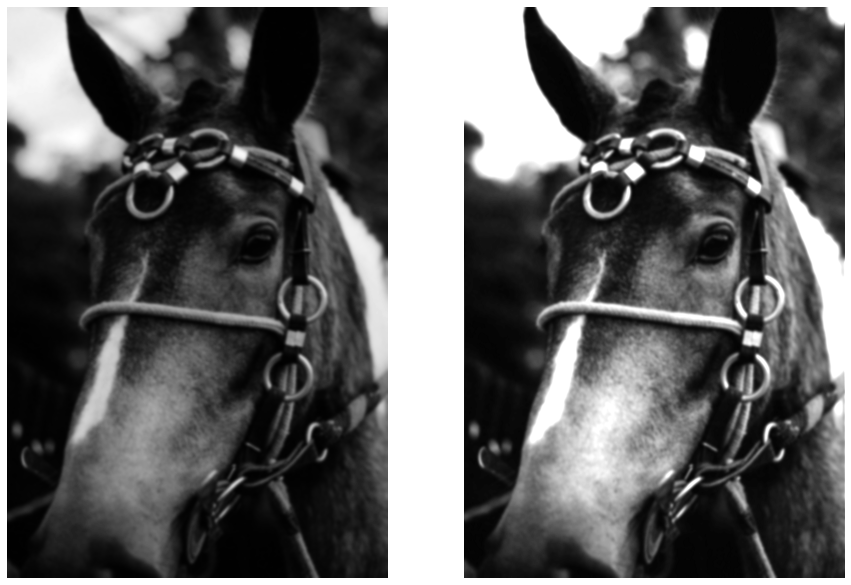

In [19]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image_array, cmap='gray')
plt.axis('off')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(new_img, cmap='gray')
plt.axis('off')

plt.show(block=True)